Support Vector Machines - COMPSCI 762

In [24]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

DS1

In [25]:
# Task 1
# Create a non-linearly separable dataset (varying C value impactful on non-linearly separable data)
def GenerateNonLinearlySeparableDatasetDS1(n):
    # X, y = make_classification(n_samples=n, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
    #                         flip_y=0.1, class_sep=0.8, random_state=10)
    X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=2)
    return X,y

def DS1(X,y):
    X_df = pd.DataFrame(data = X, columns = ['X1', 'X2'])
    y_df = pd.DataFrame(data = y, columns = ['y'])
    DS1 = pd.concat([X_df, y_df], axis = 1)
    DS1.to_csv('DS1.csv', index = False)
    

# Task 2
# Fit a linear SVM with fixed C value
def FitLinearSVM(C, X, y):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    return svm

# Plot DS1 with the decision boundary
def PlotDecisionBoundaries(C, X, y, svm):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    plt.title('Linear SVM with DS1 (C={})'.format(C))
    plt.show()

# Task 3
def LeaveOneOutCV(C, X, y):
    loo = LeaveOneOut()
    train_accuracy = []
    test_accuracy = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        svm = SVC(kernel='linear', C=C)
        svm.fit(X_train, y_train)
        
        train_pred = svm.predict(X_train)
        test_pred = svm.predict(X_test)
        
        train_accuracy.append(accuracy_score(y_train, train_pred))
        test_accuracy.append(accuracy_score(y_test, test_pred))
    # print(train_accuracy)
    # Calculate average train and test performance
    train_performance = np.mean(train_accuracy)
    test_performance = np.mean(test_accuracy)

    print('Linear SVM Performance Metrics with C={}'.format(C))
    print("Accuracy on Training Set: {:.2f}%".format(train_performance * 100))
    print("Accuracy on Testing Set: {:.2f}%".format(test_performance * 100))

    return train_performance, test_performance

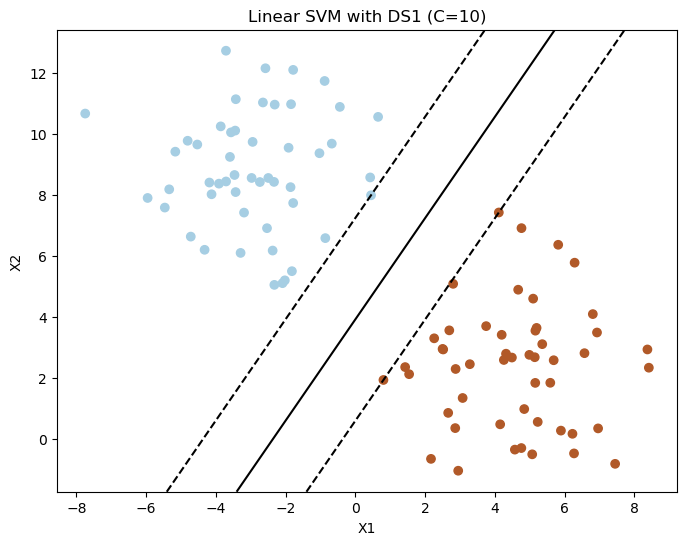

Linear SVM Performance Metrics with C=10
Accuracy on Training Set: 100.00%
Accuracy on Testing Set: 100.00%


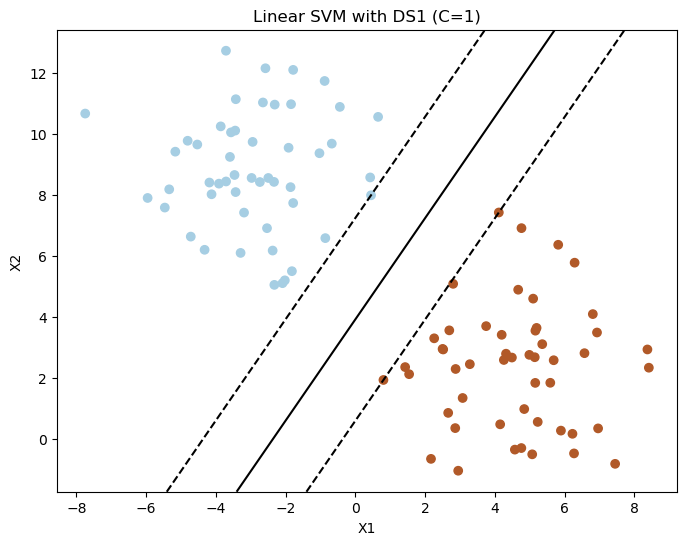

Linear SVM Performance Metrics with C=1
Accuracy on Training Set: 100.00%
Accuracy on Testing Set: 100.00%


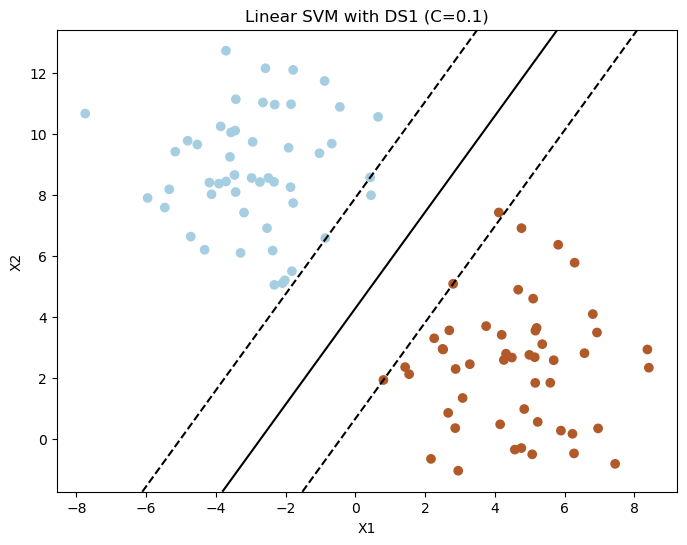

Linear SVM Performance Metrics with C=0.1
Accuracy on Training Set: 100.00%
Accuracy on Testing Set: 100.00%


In [28]:
# Task 1
X,y = GenerateNonLinearlySeparableDatasetDS1(n = 50)
DS1(X,y)

# Task 2
C = 10
svm = FitLinearSVM(C, X, y)
PlotDecisionBoundaries(C, X, y, svm)

# Task 3
train_performance, test_performance = LeaveOneOutCV(C, X, y)

# Task 4
C = 1
svm = FitLinearSVM(C, X, y)
PlotDecisionBoundaries(C, X, y, svm)
train_performance, test_performance = LeaveOneOutCV(C, X, y)

C = 0.1
svm = FitLinearSVM(C, X, y)
PlotDecisionBoundaries(C, X, y, svm)
train_performance, test_performance = LeaveOneOutCV(C, X, y)


# Notes for next sesh: Investigate into getting the mean train test errors calculations over multiple iterations to properly seeing in random states whether increasing C or decreasing improves model

Task 5 - Explain what C does and how it improved the SVM in this case

C is a hyper-parameter in SVM models that controls the misclassification rate tolerance by adjusting the margin. 

DS2

In [21]:
# Task 1
DS2 = pd.read_csv('D2.csv', header = None)
DS2

,0,1,2
0,0.729263,0.889620,1
1,0.736175,0.644006,-1
2,0.160138,0.777047,1
3,0.632488,0.915936,1
4,0.192396,0.540497,1
...,...,...,...
495,0.342166,0.958333,1
496,0.190092,0.479825,1
497,0.966590,0.425439,1
498,0.123272,0.791667,1
